## The objective of this notebook is creating and visualizing a graph of the different values of scientific name

I found some alternatives for the visualization of big graphs:
- Javascript options: 
    - https://github.com/anvaka/ngraph
    - http://anvaka.github.io/graph-drawing-libraries/#!/all#%2Fall
- Graphistry:
    - It is the most promising. 8 MM nodes at a time in the client side.
    - https://github.com/graphistry/pygraphistry
    - Requires a server.
- NetworkX
    - Nodes can be "anything" (e.g., text, images, XML records)
    - https://networkx.github.io/



## Find the scientific names and how many times they repeat

In [1]:
import pandas as pd
import networkx as nx
from pyxdameraulevenshtein import normalized_damerau_levenshtein_distance

In [2]:
df = pd.read_csv("~/humain2/humain2/static/biocolls/gold.csv", sep='\t')
df.fillna('', inplace = True)
N = len(df.index)
print("Number of rows: " + str(N))

Number of rows: 129


In [3]:
df_sn = df.groupby(['aocr:verbatimScientificName']).size().reset_index(name='count')
df_sn = df_sn.loc[ df_sn['aocr:verbatimScientificName'] != '' ]
df_sn.columns = ['scientific_name', 'count']
print(df_sn.sort_values('count', ascending = False).head())
N_sn = len(df_sn.index)
print("Number of rows: " + str(N_sn))

                             scientific_name  count
12  Arthopyrenia cinchonae (Ach.) Müll. Arg.      5
31                Cerceris convergens V.& C.      5
20                       Capraria biflora L.      4
64                     Spigelia anthelmia L.      3
35                  Cetraria laevigata Rass.      3
Number of rows: 64


#### Notes:
- 64 unique scientific names
- We used the basic group_by option to compare or find uniquenes. We could have used other methods: dictinct.

In [4]:
sn_list = df_sn['scientific_name'].tolist()
# print(sn_list)
print(sn_list[0])

Acroscyphus sphaerophoroides LÉV.


In [5]:
# Declare the graph G
G = nx.Graph()

In [18]:
# Add the nodes to the graph
i = 0
while i < len(sn_list):
    G.add_node(sn_list[i])
    i = i + 1

In [32]:
%%time
# Add the edges to the graph
subset = sn_list
i = 0
j = 0
while i < len(sn_list):
    j = i+1
    while j < len(sn_list):
        if (i != j):
            sim = 1 - normalized_damerau_levenshtein_distance (sn_list[i], sn_list[j])
            if (sim > 0.6):
                G.add_edge(sn_list[i], sn_list[j], similarity=sim )
                #print( str(sim) + "\t" + subset[i] + " - " + subset[j] )
        j = j + 1
    i = i + 1

CPU times: user 92 ms, sys: 0 ns, total: 92 ms
Wall time: 92.7 ms


## Graph Visualization

In [33]:
import matplotlib.pyplot as plt

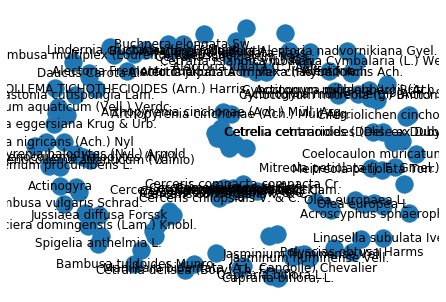

In [34]:
nx.draw(G,with_labels=True)
nx.draw(G, pos=nx.spring_layout(G))

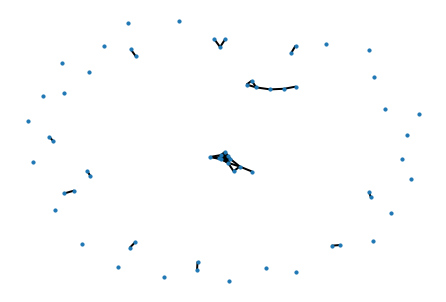

In [35]:
nx.draw(G, node_size=10, width=2, pos=nx.spring_layout(G))